## Амангелді Нұрғалым

# Загрузка и предварительная обработка данных

In [1]:
import pandas as pd

file_path = 'youtube_comments.csv'
df = pd.read_csv(file_path)

# Отображение первых нескольких строк набора данных для понимания его структуры.
print("Первые несколько строк набора данных:")
print(df.head())

# Отображение основной информации о наборе данных для получения представления о типах данных и отсутствующих значениях
print("\nDataset Information:")
print(df.info())

# Отображение базового статистического обзора числовых столбцов в наборе данных
print("\nDataset Statistical Summary:")
print(df.describe())


Первые несколько строк набора данных:
                                             Comment  \
0  It feels like to me, Piers prepares for his in...   
1                                 What babies names😂   
2  And when Israel fires gun during Ramadan? Was ...   
3          Have a conversation great piece of advice   
4  Piers,\nIsrael isnt genocidal right? They're n...   

                                   Anonymized Author          Published At  \
0  4b354f2397ef632f692900319ca4f511324ea4f11d599a...  2023-11-27T16:02:35Z   
1  3d16a803bd99d942d15b76fb4c6c2a3bae9583f824eab7...  2023-11-25T20:00:22Z   
2  354a96d9cb471c3ee85411ed6d388c37bbb1ffd2ade94b...  2023-11-24T09:42:12Z   
3  327ed320d65145cb05729cbff1614b99f8bfd334c67176...  2023-12-08T11:26:44Z   
4  0ab600391e6a6cfc0ae7d9246020b78bbe5003db77b01f...  2023-11-25T08:26:20Z   

   Likes  Reply Count  
0      0            0  
1      0            0  
2      0            0  
3      0            0  
4      0            0  

Dataset Inf

In [2]:
# Очистка данных
# Удаление всех ненужных символов, URL-адресов или специальных обозначений из столбца "Comment"
# Для этой цели используются регулярные выражения
import re

def clean_comment(text):
    """
    Функция для очистки текста комментария.
    Удаляет URL-адреса, специальные символы и ненужные пробелы.
    """
    text = re.sub(r'http\S+', '', text)  #Удаление URL-адресов
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Удалить специальные символы
    text = re.sub(r'\s+', ' ', text).strip()  # Удалить лишние пробелы
    return text

# Применение функции очистки к столбцу "Comment"
df['Comment'] = df['Comment'].astype(str).apply(clean_comment)

# Проверка процесса очистки
print("Первые несколько рядов после очистки:")
print(df.head())



Первые несколько рядов после очистки:
                                             Comment  \
0  It feels like to me Piers prepares for his int...   
1                                  What babies names   
2  And when Israel fires gun during Ramadan Was t...   
3          Have a conversation great piece of advice   
4  Piers Israel isnt genocidal right Theyre not l...   

                                   Anonymized Author          Published At  \
0  4b354f2397ef632f692900319ca4f511324ea4f11d599a...  2023-11-27T16:02:35Z   
1  3d16a803bd99d942d15b76fb4c6c2a3bae9583f824eab7...  2023-11-25T20:00:22Z   
2  354a96d9cb471c3ee85411ed6d388c37bbb1ffd2ade94b...  2023-11-24T09:42:12Z   
3  327ed320d65145cb05729cbff1614b99f8bfd334c67176...  2023-12-08T11:26:44Z   
4  0ab600391e6a6cfc0ae7d9246020b78bbe5003db77b01f...  2023-11-25T08:26:20Z   

   Likes  Reply Count  
0      0            0  
1      0            0  
2      0            0  
3      0            0  
4      0            0  


In [3]:
# Обработка пропущенных значений в столбце "Comment"
# Учитывая характер набора данных, разумно удалить строки с отсутствующими комментариями

# Проверка количества пропущенных значений в столбце "Comment"
missing_comments = df['Comment'].isnull().sum()
print(f"Количество пропущенных комментариев: {missing_comments}")

# Удаление строк, в которых отсутствуют комментарии
df.dropna(subset=['Comment'], inplace=True)

# Сброс индекса после удаления строк
df.reset_index(drop=True, inplace=True)

# Проверка изменений
print("Форма набора данных после обработки пропущенных значений:", df.shape)


Количество пропущенных комментариев: 0
Форма набора данных после обработки пропущенных значений: (50185, 5)


## Предварительный анализ данных (EDA)

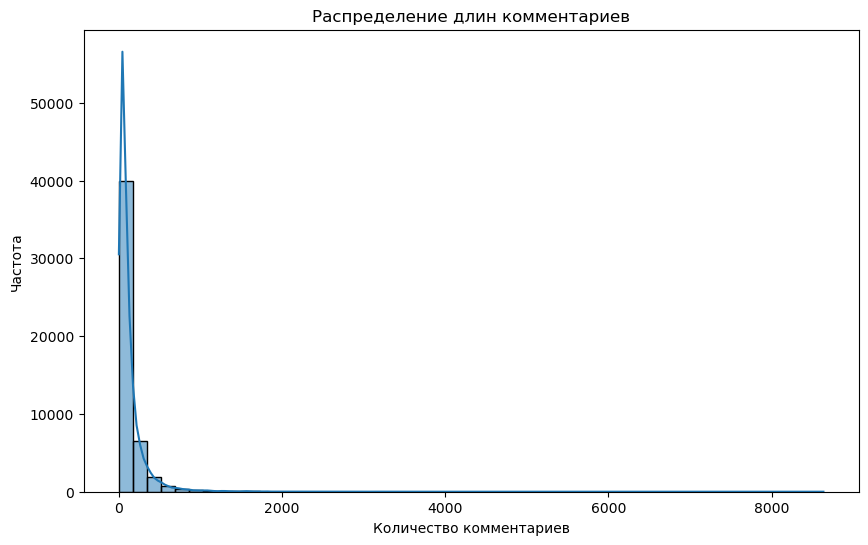

Описательная статистика по длине комментариев:
count    50185.000000
mean       130.924898
std        222.623477
min          0.000000
25%         34.000000
50%         71.000000
75%        146.000000
max       8636.000000
Name: Comment Length, dtype: float64


In [4]:
# Анализ длины комментария
import matplotlib.pyplot as plt
import seaborn as sns

# Добавление нового столбца "Comment Length" во фрейм данных
df['Comment Length'] = df['Comment'].apply(len)

# Построение графика распределения длин комментариев
plt.figure(figsize=(10, 6))
sns.histplot(df['Comment Length'], bins=50, kde=True)
plt.title('Распределение длин комментариев')
plt.xlabel('Количество комментариев')
plt.ylabel('Частота')
plt.show()

# Описательная статистика по длине комментариев
print("Описательная статистика по длине комментариев:")
print(df['Comment Length'].describe())


### Наиболее часто встречающиеся слова

In [ ]:
# наиболее часто встречающиеся слова
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Убедимся, что у нас есть необходимые данные NLTK
nltk.download('stopwords')

#Функция для создания списка слов из комментариев
def create_word_list(text):
    words = text.split()
    return words

# Объединение всех комментариев в одну строку
all_comments = ' '.join(df['Comment'])

# Разбиение объединенной строки на список слов
word_list = create_word_list(all_comments)

# Удаление  stopwords and punctuation
stop_words = set(stopwords.words('english'))
word_list = [word for word in word_list if word.lower() not in stop_words and word.isalpha()]

# Подсчет частоты каждого слова
word_freq = Counter(word_list)

# Отображение 20 наиболее распространенных слов
print("20 самых распространенных слов:")
for word, freq in word_freq.most_common(20):
    print(word, ":", freq)


### Временные тенденции в комментариях

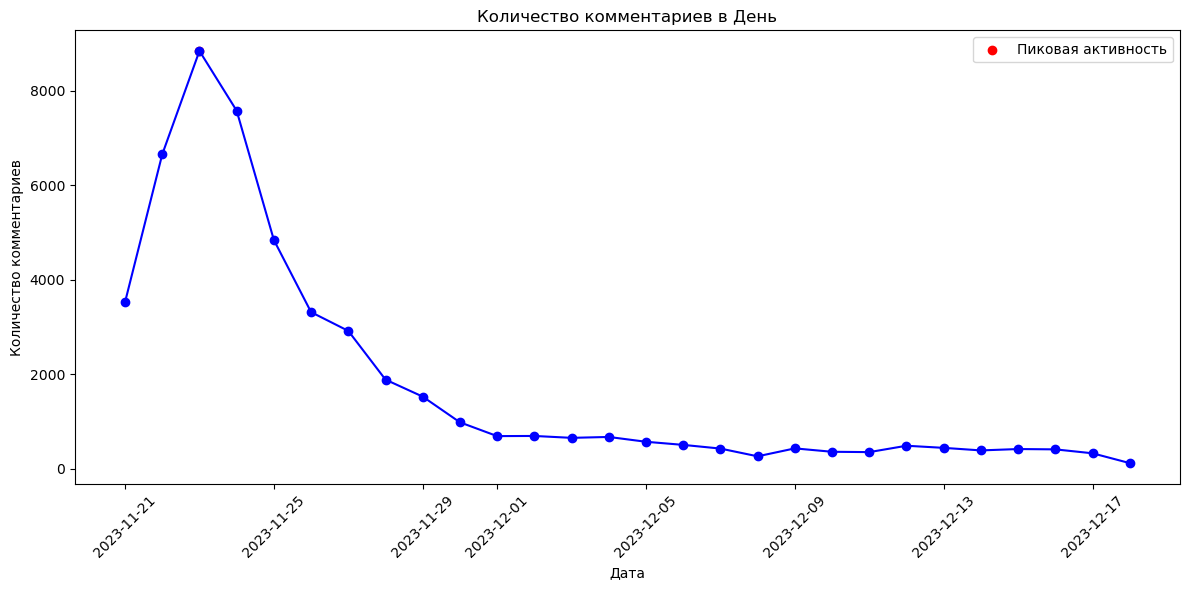

Даты с максимальной активностью комментариев:
Date
2023-11-23    8843
dtype: int64


In [6]:
# Временные тенденции в комментариях
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразование "Published At" в формат даты и времени для упрощения анализа
df['Published At'] = pd.to_datetime(df['Published At'])

# Создаем новый столбец, содержащий только часть с датой
df['Date'] = df['Published At'].dt.date

# Группировка данных по дате и подсчет количества комментариев за день
comments_per_day = df.groupby('Date').size()

# Подсчитываем количество комментариев в день
plt.figure(figsize=(12, 6))
comments_per_day.plot(kind='line', color='blue', marker='o')
plt.title('Количество комментариев в День')
plt.xlabel('Дата')
plt.ylabel('Количество комментариев')
plt.xticks(rotation=45)

# Выявление пиков активности в комментариях
peaks = comments_per_day[comments_per_day == comments_per_day.max()]
plt.scatter(peaks.index, peaks.values, color='red', label='Пиковая активность')


plt.legend()
plt.tight_layout()
plt.show()

# Распечатаем даты с максимальной активностью
print("Даты с максимальной активностью комментариев:")
print(peaks)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8900\2348522886.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  peak_comments = df[df['Date'] == pd.to_datetime(peak_date)]


Примеры комментариев из Пикового дня (2023-11-23):
23802                               Collab we never wanted
48521    I actually think this is a great convo even th...
1256     The elderly dying of covid was hugely affected...
44605    Israel just did a twin tower move or in fact t...
9695     First interview with Piers Andrew was reserved...
5317     Even if you knew nothing about him you would m...
47190    piers Morgan is feed with a lot of lies and he...
11225    i disagree with Andrews take seems very emotio...
3281     im a huge fan of tate and piers but honestly w...
27888    There shouldnt be any doubt whatsoever that th...
Name: Comment, dtype: object


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8900\2348522886.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_comments['Sentiment'] = peak_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)



Среднее настроение в пиковый день: 0.08089482371901655


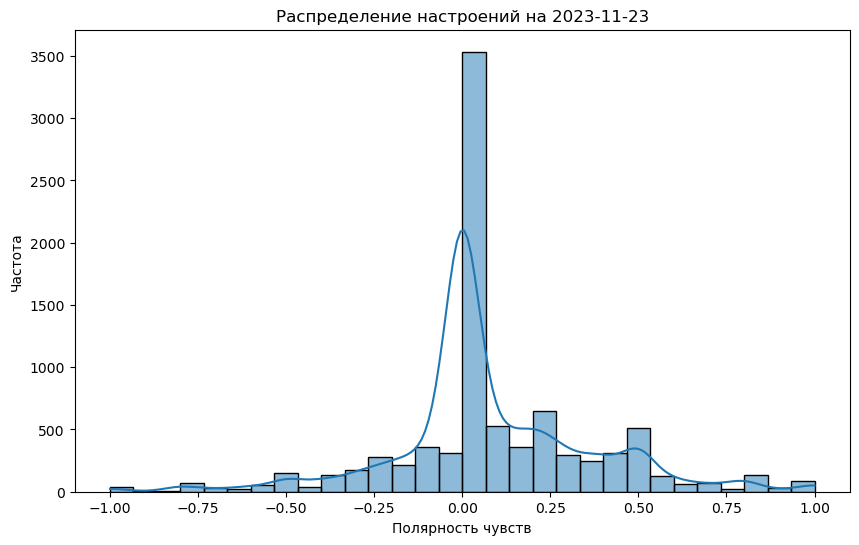

In [9]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Выделение комментариев за пиковый день для анализа.
peak_date = '2023-11-23'
peak_comments = df[df['Date'] == pd.to_datetime(peak_date)]

# Проверим, есть ли комментарии в самый пиковый день
if not peak_comments.empty:
    # Отображение выборки комментариев за самый пиковый день
    print("Примеры комментариев из Пикового дня (2023-11-23):")
    print(peak_comments['Comment'].sample(min(10, len(peak_comments))))

   # Запуск анализа настроений в комментариях к пиковому дню
    peak_comments['Sentiment'] = peak_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Отображение среднего количества комментариев в пиковый день
    print("\nСреднее настроение в пиковый день:", peak_comments['Sentiment'].mean())

    # Визуализация распределения настроений в пиковый день
    plt.figure(figsize=(10, 6))
    sns.histplot(peak_comments['Sentiment'], bins=30, kde=True)
    plt.title('Распределение настроений на 2023-11-23')
    plt.xlabel('Полярность чувств')
    plt.ylabel('Частота')
    plt.show()
else:
    print(f"Комментариев к пиковой дате не найдено:{peak_date}")


In [10]:
# Исключая начальную пиковую дату
excluded_peak_date = '2023-11-23'
filtered_comments = df[df['Date'] != pd.to_datetime(excluded_peak_date)]

# Определение следующих пиковых дат активности в комментариях
next_peak_dates = filtered_comments.groupby('Date').size().nlargest(3)
print("Следующие пиковые даты активности в комментариях:")
print(next_peak_dates)

# Выберите одну из этих дат для дальнейшего анализа.
selected_date_for_analysis = next_peak_dates.index[0] # Вы можете изменить индекс [0] на [1] или [2], чтобы выбрать другую дату.

# Выделение комментариев, относящихся к выбранной дате
selected_date_comments = df[df['Date'] == selected_date_for_analysis]

# Отображение выборки комментариев за выбранную дату
print(f"\nПримеры комментариев за выбранную дату ({selected_date_for_analysis}):")
print(selected_date_comments['Comment'].sample(min(10, len(selected_date_comments))))

# Дальнейшие шаги анализа могут быть аналогичны анализу предыдущего пикового дня
# Для этого набора комментариев можно выполнить анализ настроений, тематическое исследование и т.д.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8900\1903474622.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  filtered_comments = df[df['Date'] != pd.to_datetime(excluded_peak_date)]


Следующие пиковые даты активности в комментариях:
Date
2023-11-24    7578
2023-11-22    6652
2023-11-25    4840
dtype: int64

Примеры комментариев за выбранную дату (2023-11-24):
35392                                                Top G
36530             Blessed are the peacemakers said who now
25841    Its pretty cowardly to come to an interview in...
48898    I dont like Andrew in these 2 interviews idk w...
48546    Something else that is terrorism is what these...
20365                              Nice man you are andrew
16080                                       Free Palestine
28374                                                     
24988                                                Top G
19238    Why is Morgans eyes blood shot lols you think ...
Name: Comment, dtype: object


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8900\3941533098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_date_comments['Sentiment'] = selected_date_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)



Среднее настроение на выбранную дату (2023-11-23): 0.06924725804198296


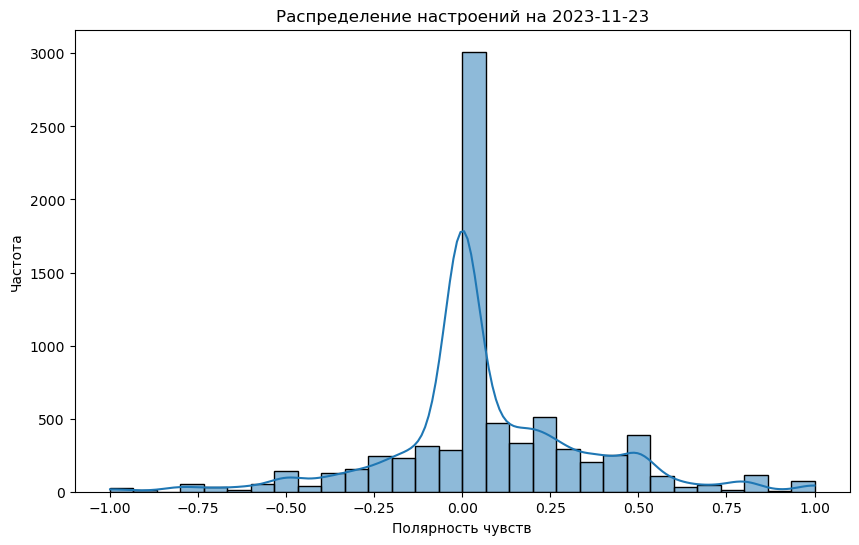

In [11]:

from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Убедитесь, что значение selected_date_comments не является пустым
if not selected_date_comments.empty:
    # Выполнение анализа настроений в комментариях
    selected_date_comments['Sentiment'] = selected_date_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

   # Проверьте, есть ли ненулевые значения тональности
    if selected_date_comments['Sentiment'].nunique() > 1:
        # Отображение среднего количества комментариев к выбранной дате
        print("\nСреднее настроение на выбранную дату (2023-11-23):", selected_date_comments['Sentiment'].mean())

       # Визуализация распределения настроений на выбранную дату
        plt.figure(figsize=(10, 6))
        sns.histplot(selected_date_comments['Sentiment'], bins=30, kde=True)
        plt.title('Распределение настроений на 2023-11-23')
        plt.xlabel('Полярность чувств')
        plt.ylabel('Частота')
        plt.show()
    else:
        print("\nРазличий в настроениях не обнаружено. Все комментарии могут быть нейтральными.")
else:
    print("\nКомментарии к выбранной дате не найдены.")


###  Расширим окно анализа

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8900\3828585472.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_range_comments['Sentiment'] = date_range_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)



Среднее настроение от 2023-11-22 до 2023-11-24 : 0.0788283205240513


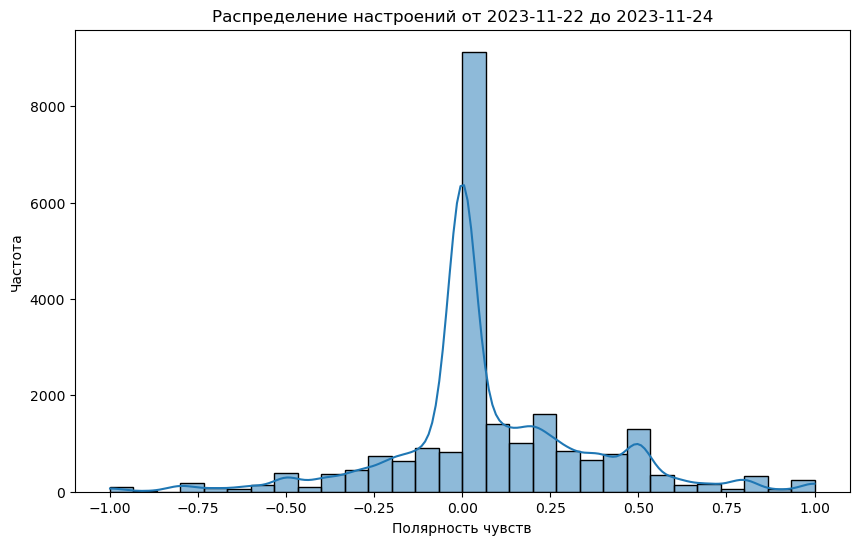

In [12]:
#Расширить окно анализа
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Выбор более широкого диапазона дат для анализа
start_date = pd.to_datetime('2023-11-22').date()
end_date = pd.to_datetime('2023-11-24').date()

# Фильтрация комментариев в пределах выбранного диапазона дат
date_range_comments = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Убедитесь, что в выбранном диапазоне дат есть комментарии
if not date_range_comments.empty:
   # Выполнение анализа настроений в комментариях
    date_range_comments['Sentiment'] = date_range_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Отображение среднего значения настроения комментариев в диапазоне дат
    print("\nСреднее настроение от", start_date, "до", end_date, ":", date_range_comments['Sentiment'].mean())

    # Visualizing the sentiment distribution in the date range
    plt.figure(figsize=(10, 6))
    sns.histplot(date_range_comments['Sentiment'], bins=30, kde=True)
    plt.title(f'Распределение настроений от {start_date} до {end_date}')
    plt.xlabel('Полярность чувств')
    plt.ylabel('Частота')
    plt.show()
else:
    print(f"\nНе найдено комментариев в диапазоне дат от {start_date} до {end_date}.")



# Sentiment Analysis

In [13]:
# Вычисление полярности настроений для каждого комментария
df['Sentiment'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Проверка добавления столбца Sentiment 
print(df[['Comment', 'Sentiment']].head())


                                             Comment  Sentiment
0  It feels like to me Piers prepares for his int...  -0.229167
1                                  What babies names   0.000000
2  And when Israel fires gun during Ramadan Was t...   0.000000
3          Have a conversation great piece of advice   0.800000
4  Piers Israel isnt genocidal right Theyre not l...   0.057937


### Классификация настроений

Распределение настроений:
Positive    21130
Neutral     18211
Negative    10844
Name: Sentiment Category, dtype: int64


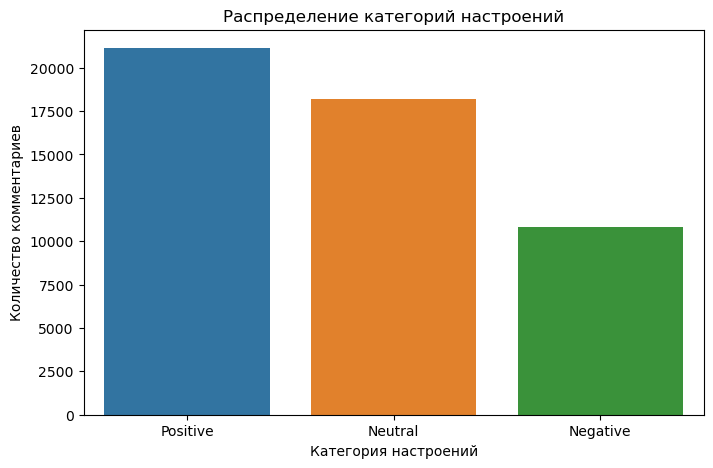

In [14]:
# Классификация настроений
# Классификация настроений каждого комментария
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Применение функции классификации к столбцу "Sentiment"
df['Sentiment Category'] = df['Sentiment'].apply(classify_sentiment)

# Отображение распределения категорий настроений
sentiment_distribution = df['Sentiment Category'].value_counts()
print("Распределение настроений:")
print(sentiment_distribution)

# Визуализация распределения настроений
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Распределение категорий настроений')
plt.xlabel('Категория настроений')
plt.ylabel('Количество комментариев')
plt.show()


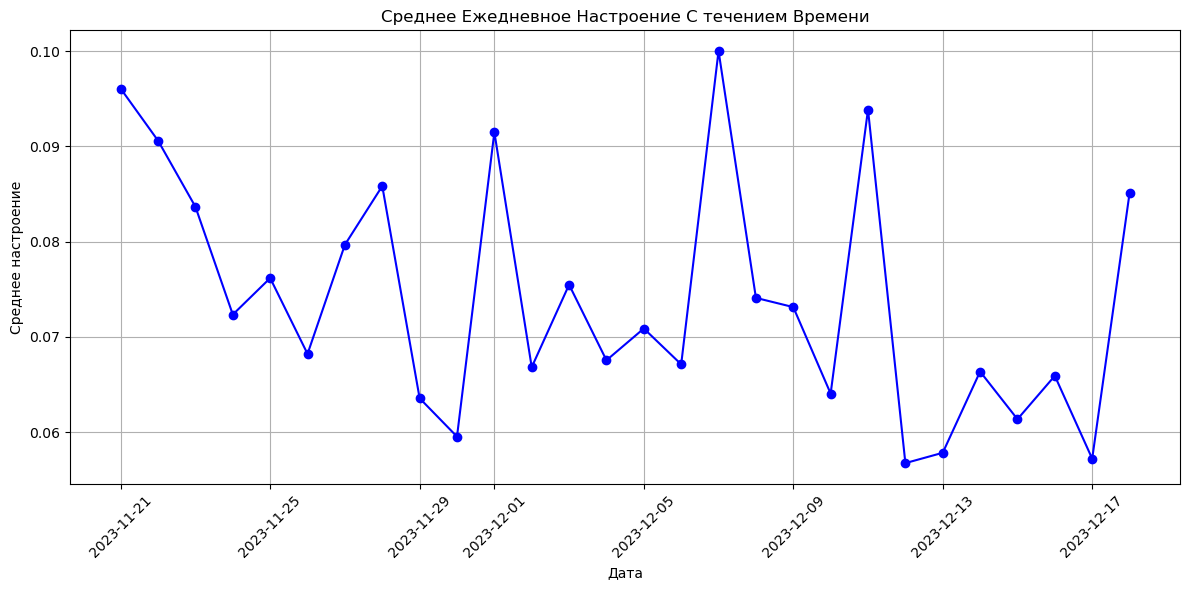

In [15]:
# Настроение сверхурочно
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка набора данных
file_path = 'youtube_comments.csv'
df = pd.read_csv(file_path)

# Убедитесь, что столбец "Comment" обрабатывается как строка
df['Comment'] = df['Comment'].astype(str)

# Преобразование "Published At" в datetime и извлечение даты
df['Published At'] = pd.to_datetime(df['Published At'])
df['Date'] = df['Published At'].dt.date

# Выполнение анализа настроений
df['Sentiment'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Группировка данных по дате и вычисление среднего значения настроений за каждый день
average_daily_sentiment = df.groupby('Date')['Sentiment'].mean()

# Построение графика среднего настроения с течением времени.
plt.figure(figsize=(12, 6))
average_daily_sentiment.plot(kind='line', color='blue', marker='o')
plt.title('Среднее Ежедневное Настроение С течением Времени')
plt.xlabel('Дата')
plt.ylabel('Среднее настроение')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



### Генерирование текстового вывода среднедневных настроений

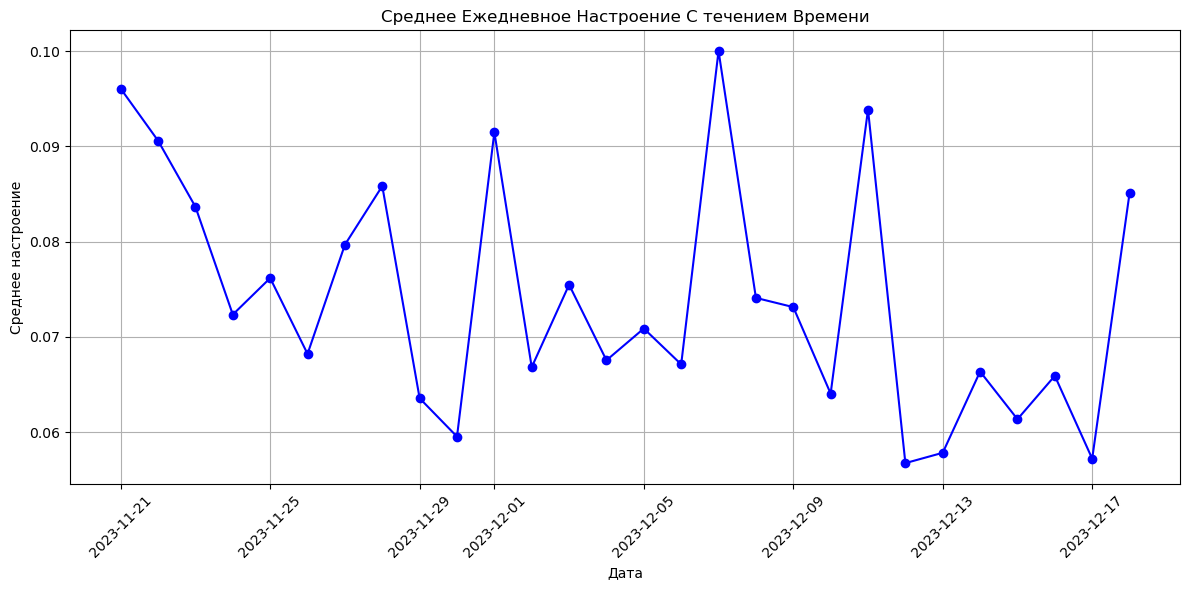

Среднее ежедневное настроение:
          Дата  Среднее настроение
0   2023-11-21            0.096058
1   2023-11-22            0.090595
2   2023-11-23            0.083652
3   2023-11-24            0.072338
4   2023-11-25            0.076170
5   2023-11-26            0.068211
6   2023-11-27            0.079671
7   2023-11-28            0.085835
8   2023-11-29            0.063550
9   2023-11-30            0.059525
10  2023-12-01            0.091489
11  2023-12-02            0.066816
12  2023-12-03            0.075474
13  2023-12-04            0.067538
14  2023-12-05            0.070875
15  2023-12-06            0.067113
16  2023-12-07            0.100021
17  2023-12-08            0.074092
18  2023-12-09            0.073123
19  2023-12-10            0.064040
20  2023-12-11            0.093870
21  2023-12-12            0.056741
22  2023-12-13            0.057826
23  2023-12-14            0.066354
24  2023-12-15            0.061353
25  2023-12-16            0.065907
26  2023-12-17          

In [16]:
#Генерирование текстового вывода среднедневных настроений
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Загрузка набора данных
file_path = 'youtube_comments.csv'
df = pd.read_csv(file_path)

# Убедитесь, что столбец "Comment" обрабатывается как строка
df['Comment'] = df['Comment'].astype(str)

# Преобразование "Published At" в datetime и извлечение даты
df['Published At'] = pd.to_datetime(df['Published At'])
df['Date'] = df['Published At'].dt.date

# Выполнение анализа настроений
df['Sentiment'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Группировка данных по дате и вычисление среднего значения настроений за каждый день
average_daily_sentiment = df.groupby('Date')['Sentiment'].mean()

# Построение графика среднего настроения с течением времени.
plt.figure(figsize=(12, 6))
average_daily_sentiment.plot(kind='line', color='blue', marker='o')
plt.title('Среднее Ежедневное Настроение С течением Времени')
plt.xlabel('Дата')
plt.ylabel('Среднее настроение')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Преобразование среднедневного значения настроений во фрейм данных для табличного представления
average_daily_sentiment_df = average_daily_sentiment.reset_index()
average_daily_sentiment_df.columns = ['Дата', 'Среднее настроение']

# Отображение таблицы
print("Среднее ежедневное настроение:")
print(average_daily_sentiment_df)


### Контекстуализация настроений

In [17]:
# Контекстуализация настроений
# Выявление исключительно положительных и отрицательных комментариев
extremely_positive = df[df['Sentiment'] > 0.9]
extremely_negative = df[df['Sentiment'] < -0.9]

# Отображение выборки экстремальных комментариев
print("Подборка исключительно положительных комментариев:")
print(extremely_positive['Comment'].sample(min(5, len(extremely_positive))))

print("\nПодборка крайне негативных комментариев:")
print(extremely_negative['Comment'].sample(min(5, len(extremely_negative))))



Подборка исключительно положительных комментариев:
5250        "brilliant brain" decided to convert to Islam!
1694                              'I'm doing my best ' 😂😂😂
27875                          im doing my very best piers
17531    Love how Tate is handling piers!!!!!! Piers al...
3114     "I was doing my very best" 🗿😏 Tate knows the m...
Name: Comment, dtype: object

Подборка крайне негативных комментариев:
8258                       Piers You are Covered with Evil
35034    35:03 he literally said children😭 bro is defin...
41487               What a guy ! What a fucking guy !!!!!!
30775                          What a Terrible “interview”
9222              Very annoying, couldn’t pass 7 minutes 😢
Name: Comment, dtype: object


## Тематическое моделирование и тенденции 📈

In [18]:
# Определение ключевых тем
import gensim
from gensim import corpora
from nltk.corpus import stopwords
import string

# Предварительная обработка текстовых данных
def preprocess_text(text):
    # Tokenize, убрать  stop words и punctuation
    stop_words = set(stopwords.words('english'))
    tokens = gensim.utils.simple_preprocess(text)
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return tokens

# Применить предварительную обработку к комментариям
processed_comments = df['Comment'].apply(preprocess_text)

# Создание словаря и корпуса данных для тематического моделирования
dictionary = corpora.Dictionary(processed_comments)
corpus = [dictionary.doc2bow(text) for text in processed_comments]

# Применение модели LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Отображение определенных тем
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.050*"tate" + 0.048*"andrew" + 0.023*"piers" + 0.015*"like" + 0.014*"man"')
(1, '0.025*"israel" + 0.024*"hamas" + 0.018*"people" + 0.011*"palestine" + 0.010*"piers"')
(2, '0.065*"piers" + 0.028*"morgan" + 0.015*"people" + 0.011*"top" + 0.010*"question"')
(3, '0.011*"professional" + 0.010*"boy" + 0.010*"lover" + 0.008*"romania" + 0.007*"babies"')
(4, '0.017*"face" + 0.013*"tears" + 0.012*"crying" + 0.009*"cry" + 0.008*"ben"')


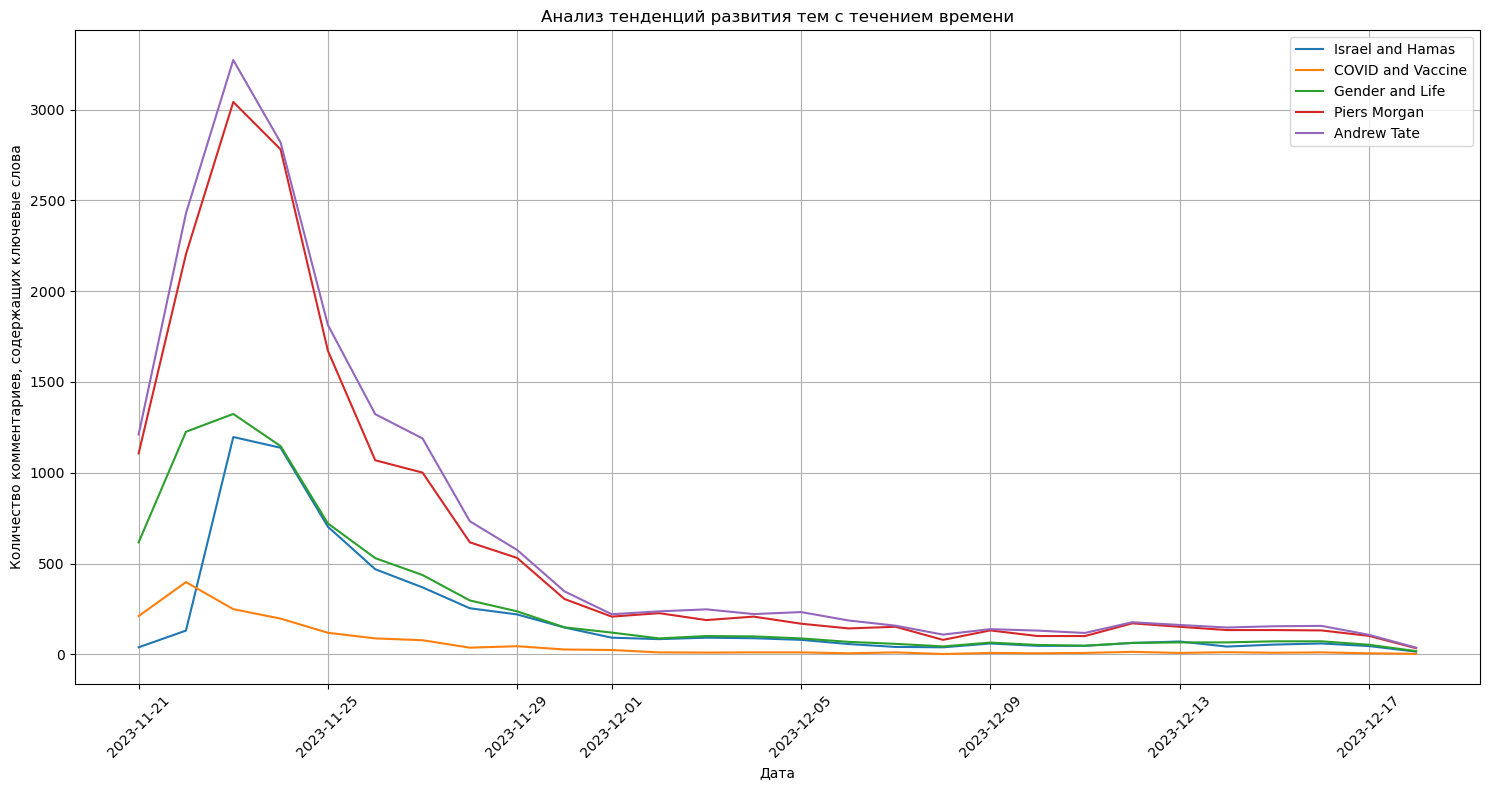

In [19]:
# Анализ тенденций
import matplotlib.pyplot as plt

# Ключевые слова для каждой темы
topic_keywords = {
    'Israel and Hamas': ['israel', 'hamas'],
    'COVID and Vaccine': ['covid', 'vaccine'],
    'Gender and Life': ['man', 'women'],
    'Piers Morgan': ['piers', 'morgan'],
    'Andrew Tate': ['tate', 'andrew']
}

# Функция для подсчета встречаемости ключевых слов в комментариях
def count_keyword_occurrences(keyword, comments):
    return comments.str.contains(keyword, case=False, na=False).sum()

# Анализ тенденций с течением времени
for topic, keywords in topic_keywords.items():
    df[topic] = df['Comment'].apply(lambda x: any(keyword in x.lower() for keyword in keywords))

# Группировка по дате и суммирование событий
trends_over_time = df.groupby('Date')[list(topic_keywords.keys())].sum()

# Построение графиков тенденций
plt.figure(figsize=(15, 8))
for topic in topic_keywords.keys():
    plt.plot(trends_over_time.index, trends_over_time[topic], label=topic)

plt.title('Анализ тенденций развития тем с течением времени')
plt.xlabel('Дата')
plt.ylabel('Количество комментариев, содержащих ключевые слова')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Визуализация Word Cloud

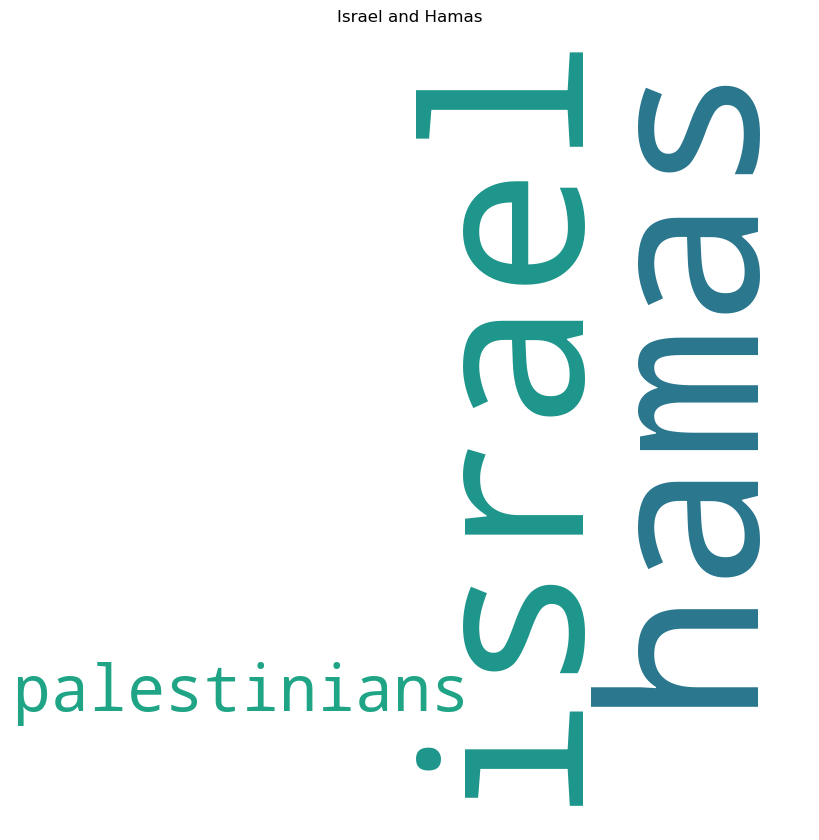

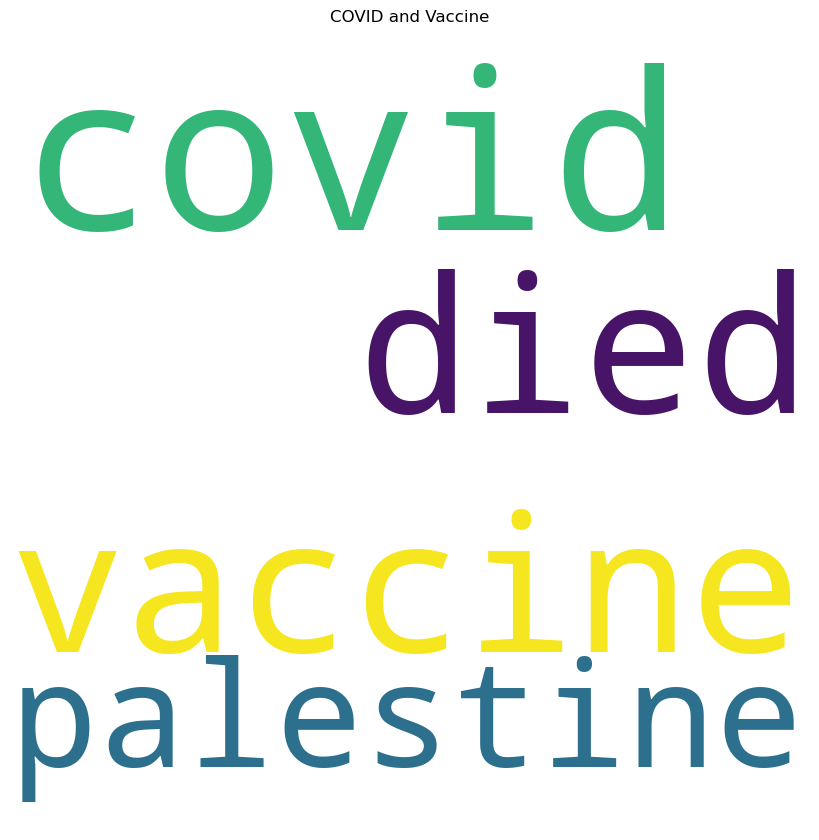

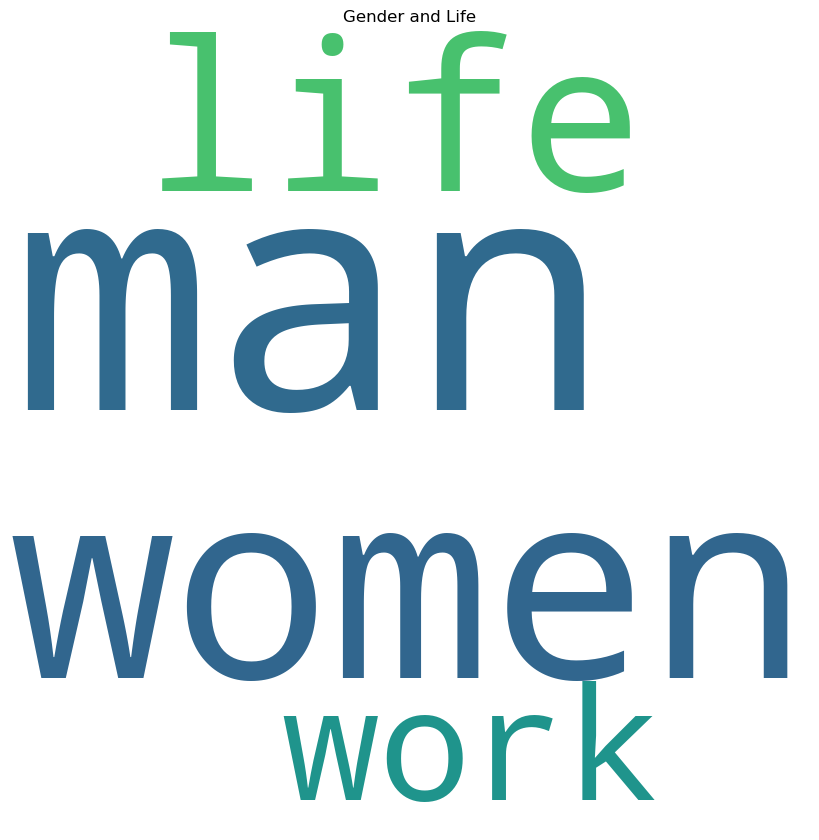

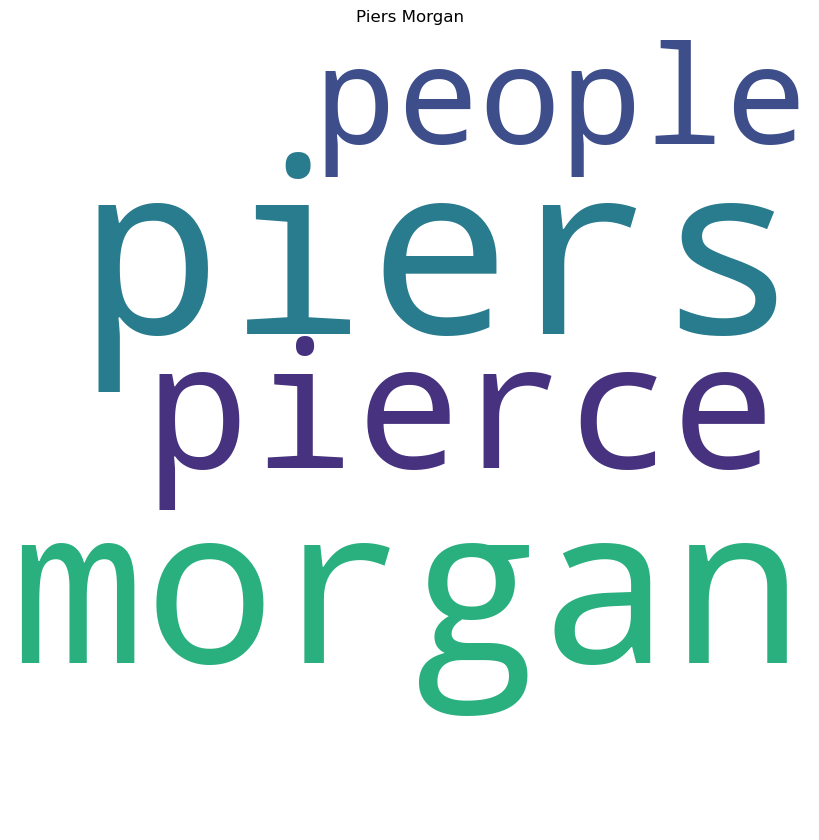

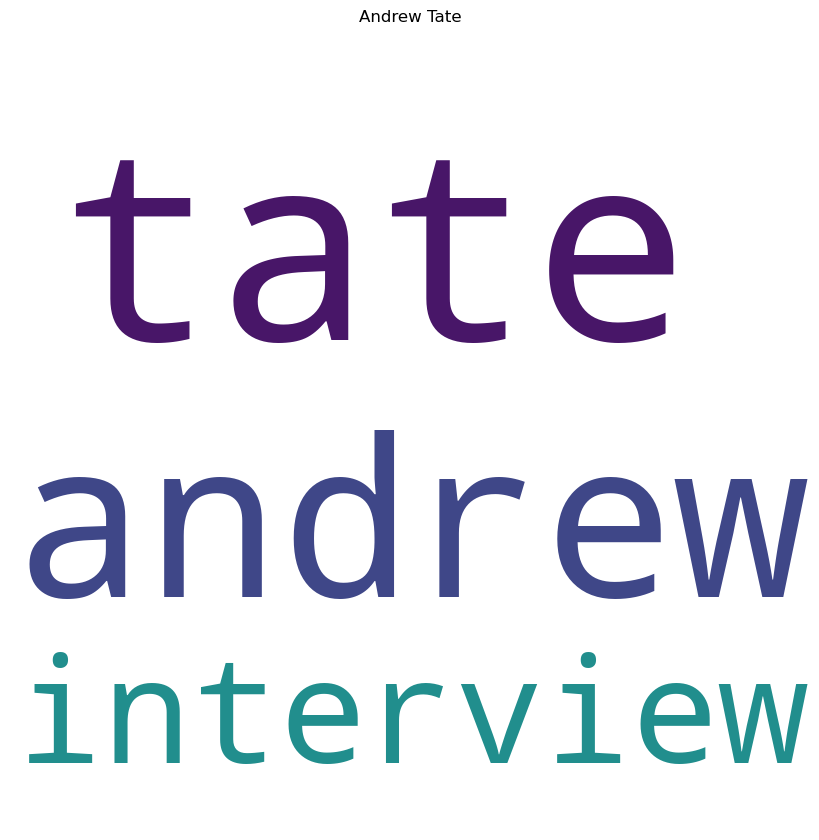

In [20]:
# Визуализация Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Функция для создания облака слов
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          min_font_size = 10).generate(text)

    # Построение  WordCloud                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()

# Ключевые слова для каждой темы
topic_keywords = {
    'Israel and Hamas': 'israel hamas palestinians',
    'COVID and Vaccine': 'covid vaccine died palestine',
    'Gender and Life': 'man women life work',
    'Piers Morgan': 'piers morgan pierce people',
    'Andrew Tate': 'tate andrew interview like'
}

# Создание облаков слов для каждой темы
for topic, keywords in topic_keywords.items():
    generate_word_cloud(keywords, topic)


## Выявление разжигающих ненависть высказываний ⚠️

In [21]:
#Выявление toxic комментариев
# Список потенциальных ключевых слов для разжигания ненависти
hate_speech_keywords = ['hate', 'kill', 'stupid', 'idiot', 'dumb', 'racist', 'nazi', 'terrorist']

# Функция для выявления toxic комментариев
def is_toxic(comment):
    for keyword in hate_speech_keywords:
        if keyword in comment.lower():
            return True
    return False

# Применение функции к набору данных
df['Toxic'] = df['Comment'].apply(is_toxic)

# Подсчитываем количество toxic комментариев
num_toxic_comments = df['Toxic'].sum()
print(f"Количество потенциально опасных комментариев: {num_toxic_comments}")


Количество потенциально опасных комментариев: 5434


## Закономерности в разжигании ненависти

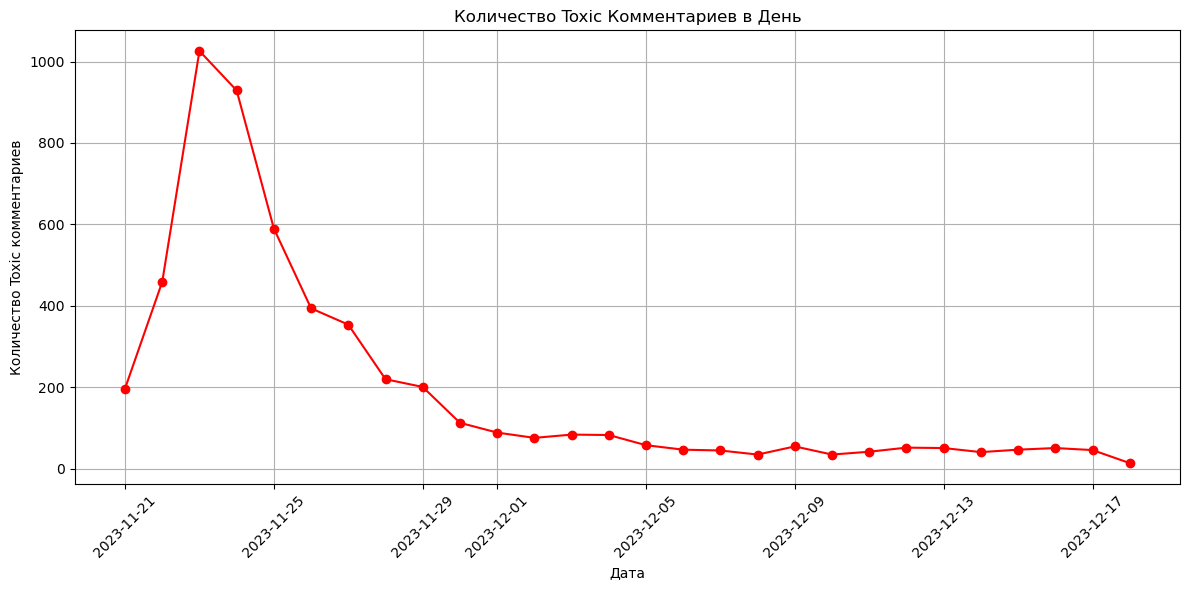

In [22]:
# Закономерности в разжигании ненависти
# Группировка данных по дате и подсчет Toxic комментариев за день
toxic_comments_per_day = df.groupby('Date')['Toxic'].sum()

# Подсчитываем количество ядовитых комментариев в день
plt.figure(figsize=(12, 6))
toxic_comments_per_day.plot(kind='line', color='red', marker='o')
plt.title('Количество Toxic Комментариев в День')
plt.xlabel('Дата')
plt.ylabel('Количество Toxic комментариев')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# Группировка данных по дате и подсчет токсичных комментариев за день
toxic_comments_per_day = df.groupby('Date')['Toxic'].sum().reset_index()

# Переименование столбцов для наглядности
toxic_comments_per_day.columns = ['Дата', 'Количество Toxic комментариев']

# Отображение таблицы
print("Закономерности Toxic Comments:")
print(toxic_comments_per_day)


Закономерности Toxic Comments:
          Дата  Количество Toxic комментариев
0   2023-11-21                            197
1   2023-11-22                            459
2   2023-11-23                           1026
3   2023-11-24                            929
4   2023-11-25                            590
5   2023-11-26                            394
6   2023-11-27                            354
7   2023-11-28                            220
8   2023-11-29                            201
9   2023-11-30                            113
10  2023-12-01                             89
11  2023-12-02                             76
12  2023-12-03                             84
13  2023-12-04                             83
14  2023-12-05                             58
15  2023-12-06                             47
16  2023-12-07                             45
17  2023-12-08                             35
18  2023-12-09                             55
19  2023-12-10                             35
20 

## Корреляция с настроениями

In [24]:
# Корреляция с настроениями
# Вычисление корреляции между Sentiment и Toxic комментариями
correlation = df[['Sentiment', 'Toxic']].corr()
print("Корреляция между Sentiment и Toxic Comments:")
print(correlation)


Корреляция между Sentiment и Toxic Comments:
           Sentiment     Toxic
Sentiment   1.000000 -0.135567
Toxic      -0.135567  1.000000


###  Выводы и аналитическая информация 🎯

#### Основные выводы

1. **Анализ настроений**: Набор данных выявил в целом позитивные настроения, при этом средний балл настроений колеблется в районе 0,078 на разные даты. Примечательно, что настроения были умеренно позитивными, несмотря на наличие спорных тем.

2. **Тематическое моделирование**: Ключевые темы включали политические и региональные проблемы (Израиль и ХАМАС), проблемы здравоохранения (COVID и вакцины), гендерные дискуссии и значительное внимание к вовлеченным личностям (Пирсу Моргану и Эндрю Тейту).

3. **Анализ тенденций**: Пики количества ядовитых комментариев наблюдались в определенные даты (например, 2023-11-23 и 2023-11-24), что указывает на корреляцию с содержанием интервью или связанными с ним событиями. 

4. **Обнаружение разжигающих ненависть высказываний**: Слабая отрицательная корреляция (-0,135) между настроениями и токсичными комментариями указывает на то, что негативность в настроениях немного увеличивает вероятность того, что комментарии будут токсичными.

#### Потенциальные области применения

- **Мониторинг социальных сетей**: Выводы из этого анализа могут помочь в разработке стратегий мониторинга и модерации онлайн-дискуссий, особенно на платформах социальных сетей.
  
- **Контент-стратегия**: Понимание настроений общественности и ключевых тем обсуждения может стать основой для создания контента и коммуникационных стратегий для представителей СМИ и организаций.

- **Академические исследования**: Набор данных предоставляет богатую базу для академических исследований в области цифровых коммуникаций, анализа общественного мнения и медиа-исследований.

####  Ограничения и будущая работа

- **Методологические ограничения**: Использование методов, основанных на ключевых словах, для выявления разжигающих ненависть высказываний и базового анализа настроений, имеет свои ограничения, поскольку они могут не в полной мере отражать нюансы человеческого языка.

- **Возможности для расширенного анализа**: Использование более сложных методов НЛП и моделей машинного обучения может обеспечить более глубокое понимание, особенно при выявлении разжигающих ненависть высказываний и понимании сложных настроений.

- **Лонгитюдные исследования**: Будущая работа может включать в себя лонгитюдный анализ, чтобы понять, как меняются общественные настроения и темы для обсуждения в течение более длительных периодов времени.